## EDA Project: Busiest MTA stations near NYU during move-in week

####  The goal is to find which of the 4 stations near NYU (Astor Place Station, Eighth Street Station, West 4th-Washington Sq Station, Christopher St-Sheridan Sq Station) is the busiest, in terms of exiting the station onto campus, during Fall move-in week. 

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

####  Get the data

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine("sqlite:///mta_data.db")
engine

In [ ]:
all_tables = engine.table_names()
all_tables

In [ ]:
mta_data = pd.read_sql('SELECT * FROM mta_data;', engine)
mta_data

In [ ]:
#limit to NYU stations and clean up columns
nyu_stations = ['ASTOR PL', '8 ST-NYU', 'W 4 ST-WASH SQ', 'CHRISTOPHER ST']
nyu_df = mta_data[mta_data['STATION'].isin(nyu_stations)].reset_index()
nyu_df.columns = [column.strip() for column in nyu_df.columns]
nyu_df.drop(columns = ['DIVISION', 'DESC','ENTRIES'], inplace=True)

#save to pickle
nyu_df.to_pickle('nyu_df_sql.pkl')

### Clean the smaller data

In [2]:
nyu_df = pd.read_pickle('nyu_df_sql.pkl')

In [3]:
nyu_df

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS
0,6045,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,00:00:00,3684742
1,6046,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,04:00:00,3684761
2,6047,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,08:00:00,3684790
3,6048,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,12:00:00,3684881
4,6049,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,16:00:00,3685042
...,...,...,...,...,...,...,...,...,...
35876,3244094,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,05:00:00,9867130
35877,3244095,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,09:00:00,9867689
35878,3244096,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,13:00:00,9868627
35879,3244097,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,17:00:00,9869712


In [4]:
nyu_df["DATE_TIME"] = pd.to_datetime(nyu_df.DATE + " " + nyu_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [5]:
# from MTA2 exercises, checking if recorded exit from each turnstile is unique
(nyu_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count().reset_index().sort_values("EXITS", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A038,R085,00-00-00,8 ST-NYU,2018-08-18 00:00:00,1
23923,R125,R189,00-00-00,CHRISTOPHER ST,2018-09-09 16:00:00,1
23917,R125,R189,00-00-00,CHRISTOPHER ST,2018-09-08 16:00:00,1
23918,R125,R189,00-00-00,CHRISTOPHER ST,2018-09-08 20:00:00,1
23919,R125,R189,00-00-00,CHRISTOPHER ST,2018-09-09 00:00:00,1
...,...,...,...,...,...,...
11955,N080,R138,00-06-00,W 4 ST-WASH SQ,2019-08-18 17:00:00,1
11954,N080,R138,00-06-00,W 4 ST-WASH SQ,2019-08-18 13:00:00,1
11953,N080,R138,00-06-00,W 4 ST-WASH SQ,2019-08-18 09:00:00,1
11952,N080,R138,00-06-00,W 4 ST-WASH SQ,2019-08-18 05:00:00,1


In [6]:
nyu_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
nyu_df #no duplicates 

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME
0,6045,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,00:00:00,3684742,2021-09-04 00:00:00
1,6046,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,04:00:00,3684761,2021-09-04 04:00:00
2,6047,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,08:00:00,3684790,2021-09-04 08:00:00
3,6048,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,12:00:00,3684881,2021-09-04 12:00:00
4,6049,A038,R085,00-00-00,8 ST-NYU,NRW,09/04/2021,16:00:00,3685042,2021-09-04 16:00:00
...,...,...,...,...,...,...,...,...,...,...
35876,3244094,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,05:00:00,9867130,2018-08-24 05:00:00
35877,3244095,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,09:00:00,9867689,2018-08-24 09:00:00
35878,3244096,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,13:00:00,9868627,2018-08-24 13:00:00
35879,3244097,R220,R160,01-03-02,ASTOR PL,6,08/24/2018,17:00:00,9869712,2018-08-24 17:00:00


In [7]:
# adding column for year 
nyu_df['YEAR'] = nyu_df['DATE_TIME'].dt.year

In [8]:
nyu_df.sort_values("DATE_TIME", inplace=True)

In [9]:
# adding columns for previous time and exit count
nyu_df[["PREV_TIME", "PREV_EXITS"]] = nyu_df.groupby(["C/A", "UNIT", "SCP", "STATION", "YEAR"])[["DATE_TIME", "EXITS"]].apply(lambda grp: grp.shift(1))

In [10]:
# find and drop the earliest date from each groupby
#nyu_df[(nyu_df["PREV_TIME"].isnull()) & (nyu_df.YEAR == 2018)].info()

nyu_df.dropna(subset=["PREV_EXITS"], axis=0, inplace=True)
nyu_df

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME,YEAR,PREV_TIME,PREV_EXITS
33749,3102286,A038,R085,00-00-02,8 ST-NYU,NRW,08/18/2018,04:00:00,1483994,2018-08-18 04:00:00,2018,2018-08-18 00:00:00,1483987.0
33791,3102328,A038,R085,00-00-03,8 ST-NYU,NRW,08/18/2018,04:00:00,776628,2018-08-18 04:00:00,2018,2018-08-18 00:00:00,776621.0
33875,3102412,A038,R085,00-06-00,8 ST-NYU,NRW,08/18/2018,04:00:00,41349,2018-08-18 04:00:00,2018,2018-08-18 00:00:00,41333.0
35168,3223882,R125,R189,00-00-01,CHRISTOPHER ST,1,08/18/2018,04:00:00,3996439,2018-08-18 04:00:00,2018,2018-08-18 00:00:00,3996424.0
33917,3102454,A039,R085,01-00-00,8 ST-NYU,NRW,08/18/2018,04:00:00,5603275,2018-08-18 04:00:00,2018,2018-08-18 00:00:00,5603196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,59539,N083,R138,01-06-01,W 4 ST-WASH SQ,ABCDEFM,09/10/2021,21:00:00,129675,2021-09-10 21:00:00,2021,2021-09-10 17:00:00,129357.0
2127,156058,R220,R160,01-00-01,ASTOR PL,6,09/10/2021,21:00:00,1504688,2021-09-10 21:00:00,2021,2021-09-10 17:00:00,1504600.0
1425,122247,PTH09,R548,00-00-00,CHRISTOPHER ST,1,09/10/2021,22:15:43,89470,2021-09-10 22:15:43,2021,2021-09-10 18:03:43,89386.0
1465,122287,PTH09,R548,00-00-01,CHRISTOPHER ST,1,09/10/2021,22:45:39,668577,2021-09-10 22:45:39,2021,2021-09-10 18:33:39,668318.0


In [11]:
#testing
nyu_df[(nyu_df.STATION == '8 ST-NYU') &
       (nyu_df.SCP == '00-00-00') & (nyu_df.UNIT == 'R085') & (nyu_df['C/A'] == 'A038') &
       (nyu_df['DATE_TIME'] >= '2021-8-28') & (nyu_df['DATE_TIME'] <= '2021-8-29')]

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME,YEAR,PREV_TIME,PREV_EXITS
2296,215518,A038,R085,00-00-00,8 ST-NYU,NRW,08/28/2021,00:00:00,3680391,2021-08-28 00:00:00,2021,2021-08-27 20:00:00,3680309.0
2297,215519,A038,R085,00-00-00,8 ST-NYU,NRW,08/28/2021,04:00:00,3680417,2021-08-28 04:00:00,2021,2021-08-28 00:00:00,3680391.0
2298,215520,A038,R085,00-00-00,8 ST-NYU,NRW,08/28/2021,08:00:00,3680448,2021-08-28 08:00:00,2021,2021-08-28 04:00:00,3680417.0
2299,215521,A038,R085,00-00-00,8 ST-NYU,NRW,08/28/2021,12:00:00,3680563,2021-08-28 12:00:00,2021,2021-08-28 08:00:00,3680448.0
2300,215522,A038,R085,00-00-00,8 ST-NYU,NRW,08/28/2021,16:00:00,3680774,2021-08-28 16:00:00,2021,2021-08-28 12:00:00,3680563.0
2301,215523,A038,R085,00-00-00,8 ST-NYU,NRW,08/28/2021,20:00:00,3681034,2021-08-28 20:00:00,2021,2021-08-28 16:00:00,3680774.0
2302,215524,A038,R085,00-00-00,8 ST-NYU,NRW,08/29/2021,00:00:00,3681142,2021-08-29 00:00:00,2021,2021-08-28 20:00:00,3681034.0


In [12]:
#finding out if any counts are negative; only one  
nyu_df[nyu_df["EXITS"] <nyu_df["PREV_EXITS"]]

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME,YEAR,PREV_TIME,PREV_EXITS
1485,122307,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/08/2021,13:42:08,730,2021-09-08 13:42:08,2021,2021-09-07 06:32:39,95284.0


In [13]:
# updating that one counter which likely reset to zero at some point
def daily_counts(row):
    counter = row.EXITS - row.PREV_EXITS
    if counter < 0:
        counter = row.EXITS
    return counter

In [14]:
nyu_df['NEW_EXITS'] = nyu_df.apply(daily_counts, axis = 1)

In [15]:
# checking that row again
nyu_df[(nyu_df.YEAR == 2021) & (nyu_df.STATION == 'CHRISTOPHER ST') &
       (nyu_df.SCP == '00-00-02') & (nyu_df.UNIT == 'R548') & (nyu_df['C/A'] == 'PTH09') &
       (nyu_df['DATE_TIME'] >= '2021-9-07') & (nyu_df['DATE_TIME'] <= '2021-9-10')]

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME,YEAR,PREV_TIME,PREV_EXITS,NEW_EXITS
1483,122305,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/07/2021,02:20:39,95237,2021-09-07 02:20:39,2021,2021-09-06 22:08:39,95198.0,39.0
1484,122306,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/07/2021,06:32:39,95284,2021-09-07 06:32:39,2021,2021-09-07 02:20:39,95237.0,47.0
1485,122307,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/08/2021,13:42:08,730,2021-09-08 13:42:08,2021,2021-09-07 06:32:39,95284.0,730.0
1486,122308,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/08/2021,17:49:23,905,2021-09-08 17:49:23,2021,2021-09-08 13:42:08,730.0,175.0
1487,122309,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/08/2021,22:01:23,1157,2021-09-08 22:01:23,2021,2021-09-08 17:49:23,905.0,252.0
1488,122310,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/09/2021,02:13:23,1178,2021-09-09 02:13:23,2021,2021-09-08 22:01:23,1157.0,21.0
1489,122311,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/09/2021,06:25:23,1219,2021-09-09 06:25:23,2021,2021-09-09 02:13:23,1178.0,41.0
1490,122312,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/09/2021,10:39:16,1524,2021-09-09 10:39:16,2021,2021-09-09 06:25:23,1219.0,305.0
1491,122313,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/09/2021,14:51:16,1617,2021-09-09 14:51:16,2021,2021-09-09 10:39:16,1524.0,93.0
1492,122314,PTH09,R548,00-00-02,CHRISTOPHER ST,1,09/09/2021,19:03:16,1942,2021-09-09 19:03:16,2021,2021-09-09 14:51:16,1617.0,325.0


In [16]:
# confirming that no new exits are negative 
nyu_df[nyu_df["NEW_EXITS"] < 0]

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME,YEAR,PREV_TIME,PREV_EXITS,NEW_EXITS


In [17]:
#finding out when max exits happened
#nyu_df.loc[nyu_df.NEW_EXITS == nyu_df.NEW_EXITS.max()]

,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,DATE_TIME,YEAR,PREV_TIME,PREV_EXITS,NEW_EXITS
18936,1741017,N083,R138,01-00-00,W 4 ST-WASH SQ,ABCDEFM,09/13/2019,21:00:00,25615773,2019-09-13 21:00:00,2019,2019-09-13 17:00:00,25612295.0,3478.0


## Graphing (line graphs first then stacked bar)

In [18]:
%matplotlib inline

In [19]:
#for all stations
station_daily = nyu_df.copy()

In [20]:
station_daily = station_daily.groupby(["STATION", "DATE"])[['NEW_EXITS']].sum().reset_index()
station_daily

,STATION,DATE,NEW_EXITS
0,8 ST-NYU,08/14/2021,5730.0
1,8 ST-NYU,08/15/2020,2642.0
2,8 ST-NYU,08/15/2021,6122.0
3,8 ST-NYU,08/16/2020,1918.0
4,8 ST-NYU,08/16/2021,4456.0
...,...,...,...
443,W 4 ST-WASH SQ,09/12/2018,39120.0
444,W 4 ST-WASH SQ,09/12/2019,42492.0
445,W 4 ST-WASH SQ,09/13/2018,40356.0
446,W 4 ST-WASH SQ,09/13/2019,45538.0


In [21]:
astor_line = station_daily[station_daily.STATION == 'ASTOR PL'].copy()
west_fourth_line = station_daily[station_daily.STATION == 'W 4 ST-WASH SQ'].copy()
christopher_line = station_daily[station_daily.STATION == 'CHRISTOPHER ST'].copy()
eighth_st_line = station_daily[station_daily.STATION == '8 ST-NYU'].copy()

In [23]:
#astor_line.sort_values('NEW_EXITS')

,STATION,DATE,NEW_EXITS
113,ASTOR PL,08/15/2020,4.0
115,ASTOR PL,08/16/2020,43.0
142,ASTOR PL,08/23/2020,49.0
170,ASTOR PL,08/30/2020,57.0
166,ASTOR PL,08/29/2020,85.0
...,...,...,...
217,ASTOR PL,09/11/2019,18739.0
193,ASTOR PL,09/05/2019,19197.0
220,ASTOR PL,09/12/2019,19580.0
197,ASTOR PL,09/06/2019,19761.0


In [22]:
import numpy as np

In [23]:
#astor_line['DAY_NUM'] = pd.to_datetime(astor_line['DATE']).dt.day
#astor_line['DAY_NUM_LABEL'] = pd.to_datetime(astor_line['DATE']).dt.strftime('%m-%d')
astor_line['YEAR'] = pd.to_datetime(astor_line['DATE']).dt.year
astor_line['DATE_TIME'] = pd.to_datetime(astor_line['DATE'])

west_fourth_line['YEAR'] = pd.to_datetime(west_fourth_line['DATE']).dt.year
west_fourth_line['DATE_TIME'] = pd.to_datetime(west_fourth_line['DATE'])

christopher_line['YEAR'] = pd.to_datetime(christopher_line['DATE']).dt.year
christopher_line['DATE_TIME'] = pd.to_datetime(christopher_line['DATE'])

eighth_st_line['YEAR'] = pd.to_datetime(eighth_st_line['DATE']).dt.year
eighth_st_line['DATE_TIME'] = pd.to_datetime(eighth_st_line['DATE'])

In [24]:
astor_line.sort_values("DATE_TIME", inplace=True)
west_fourth_line.sort_values("DATE_TIME", inplace=True)
christopher_line.sort_values("DATE_TIME", inplace=True)
eighth_st_line.sort_values("DATE_TIME", inplace=True)

In [25]:
eighth_st_line

,STATION,DATE,NEW_EXITS,YEAR,DATE_TIME
8,8 ST-NYU,08/18/2018,9407.0,2018,2018-08-18
12,8 ST-NYU,08/19/2018,8972.0,2018,2018-08-19
16,8 ST-NYU,08/20/2018,10238.0,2018,2018-08-20
20,8 ST-NYU,08/21/2018,10681.0,2018,2018-08-21
24,8 ST-NYU,08/22/2018,11255.0,2018,2018-08-22
...,...,...,...,...,...
87,8 ST-NYU,09/06/2021,4870.0,2021,2021-09-06
91,8 ST-NYU,09/07/2021,6387.0,2021,2021-09-07
95,8 ST-NYU,09/08/2021,6650.0,2021,2021-09-08
99,8 ST-NYU,09/09/2021,6815.0,2021,2021-09-09


In [26]:
#astor graph 

astor_21_order = astor_line[astor_line.YEAR == 2021].reset_index().copy()
astor_21_order['order'] = astor_21_order.index

astor_20_order = astor_line[astor_line.YEAR == 2020].reset_index().copy()
astor_20_order['order'] = astor_20_order.index

astor_19_order = astor_line[astor_line.YEAR == 2019].reset_index().copy()
astor_19_order['order'] = astor_20_order.index

astor_18_order = astor_line[astor_line.YEAR == 2018].reset_index().copy()
astor_18_order['order'] = astor_18_order.index

In [27]:
astor_graph = pd.concat([astor_21_order, astor_20_order, astor_19_order, astor_18_order])

astor_graph.set_index("index", inplace=True)

In [47]:
#make rest of graphs
def make_graph(df):
    years = [2021, 2020, 2019, 2018]
    dfs = []
    for year in years:
        new_df = df[df.YEAR == year].reset_index().copy()
        new_df['order'] = new_df.index
        dfs.append(new_df)
    df_graph = pd.concat(dfs)
    df_graph.set_index("index", inplace=True)
    return df_graph

In [48]:
west_fourth_line_graph = make_graph(west_fourth_line)
christopher_line_graph = make_graph(christopher_line)
eighth_st_line_graph = make_graph(eighth_st_line)

In [28]:
#didn't end up using in graph; used to double check dates
def order_day(order):
    if order==0 or order % 7==0:
        day = 'Sat'
    elif order==1 or order % 7==1:
        day = 'Sun'
    elif order==2 or order % 7==2:
        day = 'Mon'
    elif order==3 or order % 7==3:
        day = 'Tues'
    elif order==4 or order % 7==4:
        day = 'Wed'
    elif order==5 or order % 7==5:
        day = 'Thurs'
    elif order==6 or order % 7==6:
        day = 'Fri'
    return day

In [29]:
#astor_graph['day'] = astor_graph.order.apply(order_day)

In [30]:
#astor_graph[astor_graph.DATE_TIME == '2018-9-4']

,STATION,DATE,NEW_EXITS,YEAR,DATE_TIME,order
index,,,,,,
188,ASTOR PL,09/04/2018,15339.0,2018,2018-09-04,17


In [31]:
#Instructor's Help
#date = astor_line['DAY_NUM_LABEL'].apply(lambda label: int(label.replace('-', ''))).unique()

#num_to_date = {date:num for num, date in enumerate(date)}

#def date_helper(label):
    #date = int(label.replace('-', ''))
    #return num_to_date[date]
    
#astor_line['DAY_NUM'] = astor_line['DAY_NUM_LABEL'].apply(date_helper)

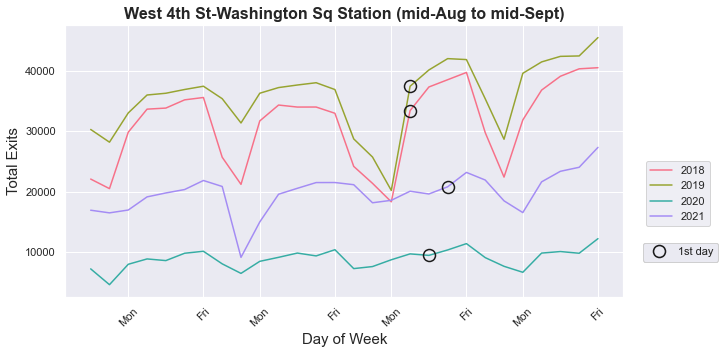

In [186]:
# west 4th plot

fig, ax = plt.subplots(1, 1)
pal = sns.color_palette('husl',4)
sns.set_style("darkgrid")
g = sns.lineplot(x='order', y='NEW_EXITS', data=west_fourth_line_graph , palette=pal, hue='YEAR', sort=True)
legend1 = plt.legend(bbox_to_anchor=(1.04,0.5), borderaxespad=0)  
plt.xticks(range(28))
plt.xticks([2,6,9,13,16,20,23, 27],['Mon','Fri', 'Mon','Fri','Mon','Fri', 'Mon','Fri'],rotation = 45)
sns.set(rc = {'figure.figsize':(10, 5)})
g.set_xlabel("Day of Week", fontsize = 15)
g.set_ylabel("Total Exits", fontsize = 15)
g.set_title('West 4th St-Washington Sq Station (mid-Aug to mid-Sept)',fontsize=16, fontweight="bold")
ax.grid(b=True, which='minor', color='white', linewidth=0.075)

#2021 first day marker
x = 19
y = west_fourth_line_graph.loc[(west_fourth_line_graph['YEAR']==2021) & (west_fourth_line_graph['DATE_TIME']=='2021-9-2'),'NEW_EXITS'].to_numpy()
label = ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5, label='1st day')
#2020 first day marker
x = 18
y = west_fourth_line_graph.loc[(west_fourth_line_graph['YEAR']==2020) & (west_fourth_line_graph['DATE_TIME']=='2020-9-2'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2019 first day marker
x = 17
y = west_fourth_line_graph.loc[(west_fourth_line_graph['YEAR']==2019) & (west_fourth_line_graph['DATE_TIME']=='2019-9-3'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2018 first day marker
x = 17
y = west_fourth_line_graph .loc[(west_fourth_line_graph['YEAR']==2018) & (west_fourth_line_graph['DATE_TIME']=='2018-9-4'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)

legend2 = plt.legend(handles=label, bbox_to_anchor=(1.17,0.20), borderaxespad=0)
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.savefig("west_fourth_line.png", bbox_inches="tight", dpi=500)
plt.show()

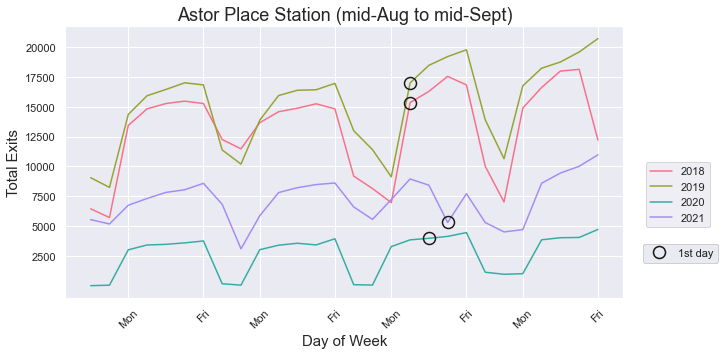

In [41]:
# astor pl

fig, ax = plt.subplots(1, 1)
pal = sns.color_palette('husl',4)
sns.set_style("darkgrid")
g = sns.lineplot(x='order', y='NEW_EXITS', data=astor_graph, palette=pal, hue='YEAR', sort=True)
legend1 = plt.legend(bbox_to_anchor=(1.04,0.5), borderaxespad=0)  
plt.xticks(range(28))
plt.xticks([2,6,9,13,16,20,23, 27],['Mon','Fri', 'Mon','Fri','Mon','Fri', 'Mon','Fri'],rotation = 45)
plt.yticks([2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
sns.set(rc = {'figure.figsize':(10, 5)})
g.set_xlabel("Day of Week", fontsize = 15)
g.set_ylabel("Total Exits", fontsize = 15)
g.set_title('Astor Place Station (mid-Aug to mid-Sept)',fontsize=18)
ax.grid(b=True, which='minor', color='white', linewidth=0.075)

#2021 first day marker
x = 19
y = astor_graph.loc[(astor_graph['YEAR']==2021) & (astor_graph['DATE_TIME']=='2021-9-2'),'NEW_EXITS'].to_numpy()
label = ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5, label='1st day')
#2020 first day marker
x = 18
y = astor_graph.loc[(astor_graph['YEAR']==2020) & (astor_graph['DATE_TIME']=='2020-9-2'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2019 first day marker
x = 17
y = astor_graph.loc[(astor_graph['YEAR']==2019) & (astor_graph['DATE_TIME']=='2019-9-3'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2018 first day marker
x = 17
y = astor_graph.loc[(astor_graph['YEAR']==2018) & (astor_graph['DATE_TIME']=='2018-9-4'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)

legend2 = plt.legend(handles=label, bbox_to_anchor=(1.17,0.20), borderaxespad=0)
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.savefig("astor_line.png", bbox_inches="tight", dpi=500)
plt.show()

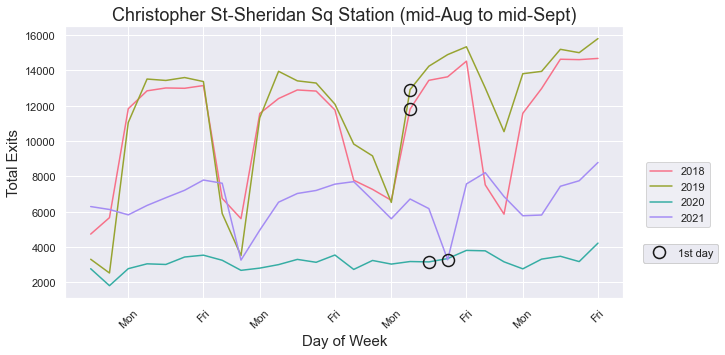

In [188]:
# Christopher St

fig, ax = plt.subplots(1, 1)
pal = sns.color_palette('husl',4)
sns.set_style("darkgrid")
g = sns.lineplot(x='order', y='NEW_EXITS', data=christopher_line_graph, palette=pal, hue='YEAR', sort=True)
legend1 = plt.legend(bbox_to_anchor=(1.04,0.5), borderaxespad=0)  
plt.xticks(range(28))
plt.xticks([2,6,9,13,16,20,23, 27],['Mon','Fri', 'Mon','Fri','Mon','Fri', 'Mon','Fri'],rotation = 45)
sns.set(rc = {'figure.figsize':(10, 5)})
g.set_xlabel("Day of Week", fontsize = 15)
g.set_ylabel("Total Exits", fontsize = 15)
g.set_title('Christopher St-Sheridan Sq Station (mid-Aug to mid-Sept)',fontsize=18)
ax.grid(b=True, which='minor', color='white', linewidth=0.075)

#2021 first day marker
x = 19
y = christopher_line_graph.loc[(christopher_line_graph['YEAR']==2021) & (christopher_line_graph['DATE_TIME']=='2021-9-2'),'NEW_EXITS'].to_numpy()
label = ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5, label='1st day')
#2020 first day marker
x = 18
y = christopher_line_graph.loc[(christopher_line_graph['YEAR']==2020) & (christopher_line_graph['DATE_TIME']=='2020-9-2'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2019 first day marker
x = 17
y = christopher_line_graph.loc[(christopher_line_graph['YEAR']==2019) & (christopher_line_graph['DATE_TIME']=='2019-9-3'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2018 first day marker
x = 17
y = christopher_line_graph.loc[(christopher_line_graph['YEAR']==2018) & (christopher_line_graph['DATE_TIME']=='2018-9-4'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)

legend2 = plt.legend(handles=label, bbox_to_anchor=(1.17,0.20), borderaxespad=0)
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.savefig("christopher_st_line.png", bbox_inches="tight", dpi=500)
plt.show()

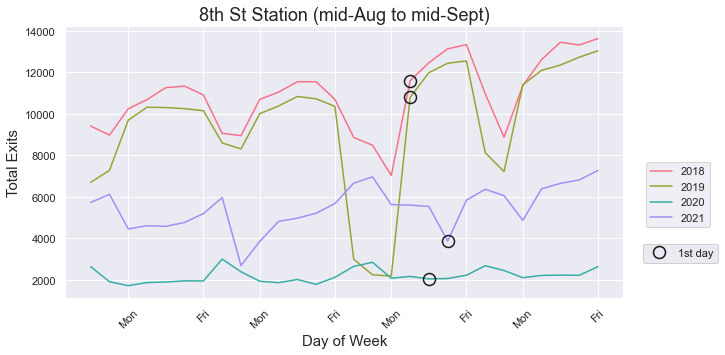

In [182]:
# 8th St station

fig, ax = plt.subplots(1, 1)
pal = sns.color_palette('husl',4)
sns.set_style("darkgrid")
g = sns.lineplot(x='order', y='NEW_EXITS', data=eighth_st_line_graph , palette=pal, hue='YEAR', sort=True)
legend1 = plt.legend(bbox_to_anchor=(1.04,0.5), borderaxespad=0)  
plt.xticks(range(28))
plt.xticks([2,6,9,13,16,20,23, 27],['Mon','Fri', 'Mon','Fri','Mon','Fri', 'Mon','Fri'],rotation = 45)
sns.set(rc = {'figure.figsize':(10, 5)})
g.set_xlabel("Day of Week", fontsize = 15)
g.set_ylabel("Total Exits", fontsize = 15)
g.set_title('8th St Station (mid-Aug to mid-Sept)',fontsize=18)
ax.grid(b=True, which='minor', color='white', linewidth=0.075)

#2021 first day marker
x = 19
y = eighth_st_line_graph.loc[(eighth_st_line_graph['YEAR']==2021) & (eighth_st_line_graph['DATE_TIME']=='2021-9-2'),'NEW_EXITS'].to_numpy()
label = ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5, label='1st day')
#2020 first day marker
x = 18
y = eighth_st_line_graph.loc[(eighth_st_line_graph['YEAR']==2020) & (eighth_st_line_graph['DATE_TIME']=='2020-9-2'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2019 first day marker
x = 17
y = eighth_st_line_graph.loc[(eighth_st_line_graph['YEAR']==2019) & (eighth_st_line_graph['DATE_TIME']=='2019-9-3'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)
#2018 first day marker
x = 17
y = eighth_st_line_graph.loc[(eighth_st_line_graph['YEAR']==2018) & (eighth_st_line_graph['DATE_TIME']=='2018-9-4'),'NEW_EXITS'].to_numpy()
ax.plot(x,y, 'ko', markersize=12, fillstyle='none', markeredgewidth=1.5)

legend2 = plt.legend(handles=label, bbox_to_anchor=(1.17,0.20), borderaxespad=0)
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.savefig("eigth_st_line.png", bbox_inches="tight", dpi=500)
plt.show()

In [ ]:
#plt.savefig("....png", dpi=)
#put higher number for dpi
#bboxinches = 'tight'

# Stacked Bar 

In [ ]:
nyu_df.info()

In [129]:
nyu_df.set_index("DATE_TIME", inplace=True)

In [130]:
#data from 8am to 12pm, exluding 8:00am exactly because exits would be before that time
eight_twelve_df = nyu_df.between_time('08:01', '12:00').copy()
#data from 12pm to 4pm, exluding 12:00pm exactly because exits would be before that time
twelve_four_df = nyu_df.between_time('12:01', '16:00').copy()
#data from 4pm to 8pm, exluding 4:00pm exactly because exits would be before that time
four_eight_df = nyu_df.between_time('16:01', '20:00').copy()

In [131]:
eight_twelve_df['time_block']=  '8am to 12pm'
twelve_four_df['time_block'] =  '12pm to 4pm'
four_eight_df['time_block']=  '4pm to 8pm'

In [132]:
full_df = pd.concat([eight_twelve_df, twelve_four_df,four_eight_df]).reset_index()
full_df

,DATE_TIME,index,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,EXITS,YEAR,PREV_TIME,PREV_EXITS,NEW_EXITS,time_block
0,2018-08-18 08:26:35,3211640,PTH09,R548,00-00-03,CHRISTOPHER ST,1,08/18/2018,08:26:35,120185,2018,2018-08-18 04:14:35,120185.0,0.0,8am to 12pm
1,2018-08-18 09:00:00,3243975,R220,R160,01-03-00,ASTOR PL,6,08/18/2018,09:00:00,137726,2018,2018-08-18 05:00:00,137694.0,32.0,8am to 12pm
2,2018-08-18 09:00:00,3150835,N083,R138,01-05-00,W 4 ST-WASH SQ,ABCDEFM,08/18/2018,09:00:00,0,2018,2018-08-18 05:00:00,0.0,0.0,8am to 12pm
3,2018-08-18 09:00:00,3150290,N080,R138,00-00-02,W 4 ST-WASH SQ,ABCDEFM,08/18/2018,09:00:00,638521,2018,2018-08-18 05:00:00,638509.0,12.0,8am to 12pm
4,2018-08-18 09:00:00,3244017,R220,R160,01-03-01,ASTOR PL,6,08/18/2018,09:00:00,5047822,2018,2018-08-18 05:00:00,5047746.0,76.0,8am to 12pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2021-09-10 20:00:00,136204,R125,R189,00-00-02,CHRISTOPHER ST,1,09/10/2021,20:00:00,5942107,2021,2021-09-10 16:00:00,5941944.0,163.0,4pm to 8pm
17962,2021-09-10 20:00:00,136246,R126,R189,01-00-00,CHRISTOPHER ST,1,09/10/2021,20:00:00,6403098,2021,2021-09-10 16:00:00,6402528.0,570.0,4pm to 8pm
17963,2021-09-10 20:00:00,6128,A038,R085,00-00-01,8 ST-NYU,NRW,09/10/2021,20:00:00,207602,2021,2021-09-10 16:00:00,207481.0,121.0,4pm to 8pm
17964,2021-09-10 20:00:00,6170,A038,R085,00-00-02,8 ST-NYU,NRW,09/10/2021,20:00:00,1641522,2021,2021-09-10 16:00:00,1641460.0,62.0,4pm to 8pm


In [133]:
full_df['time_block'] = pd.Categorical(full_df['time_block'], ordered=True, categories=["8am to 12pm", '12pm to 4pm', '4pm to 8pm'])

In [134]:
df_21 = full_df[full_df.YEAR == 2021]
df_20 = full_df[full_df.YEAR == 2020]
df_19 = full_df[full_df.YEAR == 2019]
df_18 = full_df[full_df.YEAR == 2018]

In [135]:
def make_series(df, station_name):
    series = df[df.STATION == station_name].groupby(["time_block"]).NEW_EXITS.sum()
    return series

In [136]:
# 2021 graph
astor_21 = make_series(df_21, "ASTOR PL")
eighth_st_21 = make_series(df_21,'8 ST-NYU')
west_fourth_21 = make_series(df_21,'W 4 ST-WASH SQ')
christopher_st_21 = make_series(df_21,'CHRISTOPHER ST')

In [137]:
astor_21

time_block
8am to 12pm    23732.0
12pm to 4pm    44137.0
4pm to 8pm     52731.0
Name: NEW_EXITS, dtype: float64

In [138]:
# 2020 graph
astor_20 = make_series(df_20, "ASTOR PL")
eighth_st_20 = make_series(df_20,'8 ST-NYU')
west_fourth_20 = make_series(df_20,'W 4 ST-WASH SQ')
christopher_st_20 = make_series(df_20,'CHRISTOPHER ST')

In [139]:
# 2019 graph
astor_19 = make_series(df_19, "ASTOR PL")
eighth_st_19 = make_series(df_19,'8 ST-NYU')
west_fourth_19 = make_series(df_19,'W 4 ST-WASH SQ')
christopher_st_19 = make_series(df_19,'CHRISTOPHER ST')

In [140]:
# 2018 graph
astor_18 = make_series(df_18, "ASTOR PL")
eighth_st_18 = make_series(df_18,'8 ST-NYU')
west_fourth_18 = make_series(df_18,'W 4 ST-WASH SQ')
christopher_st_18 = make_series(df_18,'CHRISTOPHER ST')

In [ ]:
#(currently using sum for one whole month, not just the central 2 weeks)

width = 0.35  

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout(pad=3, w_pad=4, h_pad=7)
fig.suptitle("Number of Exits per Time Range by Station from 2018-2021")
fig.subplots_adjust(top=0.88)

#2021

times_21 = [time for time, df in df_21.groupby('time_block')]
bottom_west_fourth_21 = [astor_21[i] + eighth_st_21[i] for i in range(len(astor_21))]
bottom_christopher_st_21 =  [astor_21[i] + eighth_st_21[i] + west_fourth_21[i] for i in range(len(astor_21))]

a1= ax1.bar(times_21, astor_21, width, label='Astor')
a2= ax1.bar(times_21, eighth_st_21, width, bottom=astor_21, label= "8th St")
a3= ax1.bar(times_21, west_fourth_21, width, bottom=bottom_west_fourth_21,label='West 4th')
a4=ax1.bar(times_21, christopher_st_21, width, bottom=bottom_christopher_st_21, label='Christopher St')

ax1.bar_label(a1, label_type='center', color='white', fontsize=10)
ax1.bar_label(a2, label_type='center', color='white', fontsize=10)
ax1.bar_label(a3, label_type='center', color='white', fontsize=10)
ax1.bar_label(a4, label_type='center', color='white', fontsize=10)

ax1.set_ylabel('Number of exits',fontweight='bold')
ax1.set_xlabel('Time range', labelpad=10, fontweight='bold')
ax1.set_title('2021')

#2020
times_20 = [time for time, df in df_20.groupby('time_block')]
bottom_west_fourth_20 = [astor_20[i] + eighth_st_20[i] for i in range(len(astor_20))]
bottom_christopher_st_20 =  [astor_20[i] + eighth_st_20[i] + west_fourth_20[i] for i in range(len(astor_20))]

b1=ax2.bar(times_20, astor_20, width, label='Astor')
b2=ax2.bar(times_20, eighth_st_20, width, bottom=astor_20, label= "8th St")
b3=ax2.bar(times_20, west_fourth_20, width, bottom=bottom_west_fourth_20,label='West 4th')
b4=ax2.bar(times_20, christopher_st_20, width, bottom=bottom_christopher_st_20, label='Christopher St')

ax2.bar_label(b1, label_type='center', color='white', fontsize=10)
ax2.bar_label(b2, label_type='center', color='white', fontsize=10)
ax2.bar_label(b3, label_type='center', color='white', fontsize=10)
ax2.bar_label(b4, label_type='center', color='white', fontsize=10)

ax2.set_ylabel('Number of exits',fontweight='bold')
ax2.set_xlabel('Time range', labelpad=10, fontweight='bold')
ax2.set_title('2020')

ax1.legend(["Astor Place", "8th St - NYU", "West 4th St - Washington Sq", "Christopher St - Sheridan Sq"], bbox_to_anchor=(3.1,-0.1))

#2019
times_19 = [time for time, df in df_19.groupby('time_block')]
bottom_west_fourth_19 = [astor_19[i] + eighth_st_19[i] for i in range(len(astor_19))]
bottom_christopher_st_19 =  [astor_19[i] + eighth_st_19[i] + west_fourth_19[i] for i in range(len(astor_19))]

c1=ax3.bar(times_19, astor_19, width, label='Astor')
c2=ax3.bar(times_19, eighth_st_19, width, bottom=astor_19, label= "8th St")
c3=ax3.bar(times_19, west_fourth_19, width, bottom=bottom_west_fourth_19,label='West 4th')
c4=ax3.bar(times_19, christopher_st_19, width, bottom=bottom_christopher_st_19, label='Christopher St')

ax3.bar_label(c1, label_type='center', color='white', fontsize=10)
ax3.bar_label(c2, label_type='center', color='white', fontsize=10)
ax3.bar_label(c3, label_type='center', color='white', fontsize=10)
ax3.bar_label(c4, label_type='center', color='white', fontsize=10)

ax3.set_ylabel('Number of exits', fontweight='bold')
ax3.set_xlabel('Time range', labelpad=10, fontweight='bold')
ax3.set_title('2019')

#2018
times_18 = [time for time, df in df_18.groupby('time_block')]
bottom_west_fourth_18 = [astor_18[i] + eighth_st_18[i] for i in range(len(astor_18))]
bottom_christopher_st_18 =  [astor_18[i] + eighth_st_18[i] + west_fourth_18[i] for i in range(len(astor_18))]

d1=ax4.bar(times_18, astor_18, width, label='Astor')
d2=ax4.bar(times_18, eighth_st_18, width, bottom=astor_18, label= "8th St")
d3=ax4.bar(times_18, west_fourth_18, width, bottom=bottom_west_fourth_18,label='West 4th')
d4=ax4.bar(times_18, christopher_st_18, width, bottom=bottom_christopher_st_18, label='Christopher St')

ax4.bar_label(d1, label_type='center', color='white', fontsize=10)
ax4.bar_label(d2, label_type='center', color='white', fontsize=10)
ax4.bar_label(d3, label_type='center', color='white', fontsize=10)
ax4.bar_label(d4, label_type='center', color='white', fontsize=10)

ax4.set_ylabel('Number of exits', fontweight='bold')
ax4.set_xlabel('Time range', labelpad=10, fontweight='bold')
ax4.set_title('2018')



plt.savefig("stacked_bars.png", bbox_inches="tight", dpi=500)
plt.show()
#put higher number for dpi
#bboxinches = 'tight'

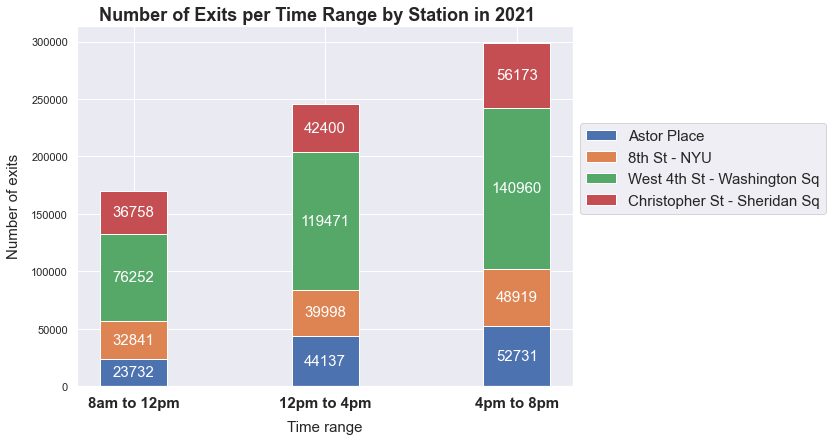

In [178]:
#just 2021 for presentation

width = 0.35  

fig, ax= plt.subplots(1, 1, figsize=(8,6))
#fig.tight_layout(pad=3, w_pad=4, h_pad=7)
fig.tight_layout(pad=2)
fig.suptitle("Number of Exits per Time Range by Station in 2021", fontsize=18, fontweight='bold')


times_21 = [time for time, df in df_21.groupby('time_block')]
bottom_west_fourth_21 = [astor_21[i] + eighth_st_21[i] for i in range(len(astor_21))]
bottom_christopher_st_21 =  [astor_21[i] + eighth_st_21[i] + west_fourth_21[i] for i in range(len(astor_21))]

a1= ax.bar(times_21, astor_21, width, label='Astor')
a2= ax.bar(times_21, eighth_st_21, width, bottom=astor_21, label= "8th St")
a3= ax.bar(times_21, west_fourth_21, width, bottom=bottom_west_fourth_21,label='West 4th')
a4=ax.bar(times_21, christopher_st_21, width, bottom=bottom_christopher_st_21, label='Christopher St')

ax.bar_label(a1, label_type='center', color='white', fontsize=15)
ax.bar_label(a2, label_type='center', color='white', fontsize=15)
ax.bar_label(a3, label_type='center', color='white', fontsize=15)
ax.bar_label(a4, label_type='center', color='white', fontsize=15)

ax.set_ylabel('Number of exits',labelpad=10, fontsize=15)
ax.set_xlabel('Time range', labelpad=10,fontsize=15)
plt.xticks(fontsize=15, fontweight='bold')

ax.legend(["Astor Place", "8th St - NYU", "West 4th St - Washington Sq", "Christopher St - Sheridan Sq"], bbox_to_anchor=(1,0.75), fontsize=15)

plt.savefig("2021_stacked_bars.png", bbox_inches="tight", dpi=500)
plt.show()